# Librerías

In [1]:
import re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from concurrent.futures import ProcessPoolExecutor

from transformers import pipeline
import time

import warnings
# Ignorar todas las advertencias (no recomendado en general)
warnings.filterwarnings("ignore")


# Cargar datos limpios

In [2]:
# Cargar datos
df_clean = pd.read_csv('/Users/David Lopez/Casos Analitica/Práctica 2/twitter_cleaned.csv')

In [3]:
# Verificar si hay valores nulos en cada columna
nulos_por_columna = df_clean.isnull().sum()
df_clean['mentioned_users'] = df_clean['mentioned_users'].fillna('')
#print(nulos_por_columna)
df_clean.head(5)

,sentiment_score,tweet_date,user,hour_of_day,day_of_week,clean_tweet,mentioned_users
0,0,2009-04-06,scotthamilton,22,0,upset cant update facebook texting might cry r...,
1,0,2009-04-06,mattycus,22,0,dived many time ball managed save rest go bound,kenichan
2,0,2009-04-06,ElleCTF,22,0,whole body feel itchy like fire,
3,0,2009-04-06,Karoli,22,0,behaving im mad cant see,nationwideclass
4,0,2009-04-06,joy_wolf,22,0,whole crew,kwesidei


## Transformers

In [5]:
df=df_clean

In [6]:

# Cargar el pipeline de análisis de sentimientos con el modelo especificado
sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english", revision="af0f99b")

# Ajusta el tamaño del lote según la memoria disponible
batch_size = 2000  # Ajusta este valor según la memoria disponible en tu sistema

# Inicializar lista para almacenar los resultados
sentiment_scores = []

start_time = time.time()

# Dividir el dataframe en lotes y procesarlos en paralelo
for i, batch_start in enumerate(range(0, len(df), batch_size)):
    batch = df['clean_tweet'].iloc[batch_start:batch_start + batch_size].tolist()
    scores = sentiment_analyzer(batch)
    sentiment_scores.extend(scores)

    # Mostrar progreso y tiempo estimado restante
    percent_complete = (i + 1) / ((len(df) + batch_size - 1) // batch_size) * 100
    elapsed_time = time.time() - start_time
    remaining_time = elapsed_time / percent_complete * (100 - percent_complete)
    
    # Convertir tiempo restante a horas y minutos
    remaining_hours = int(remaining_time // 3600)
    remaining_minutes = int((remaining_time % 3600) // 60)
    
    print(f"Lote {i + 1}/{((len(df) + batch_size - 1) // batch_size)} procesado ({percent_complete:.2f}% completo) - Tiempo estimado restante: {remaining_hours} horas y {remaining_minutes} minutos")

end_time = time.time()

total_processing_time = end_time - start_time
total_hours = total_processing_time / 3600

print(f"Tiempo total de procesamiento: {total_processing_time:.2f} segundos")
print(f"Lo que equivale a aproximadamente {total_hours:.2f} horas")

# Extraer puntajes de sentimiento del resultado
sentiment_scores = [score['score'] * (5 if score['label'] == 'POSITIVE' else -5) for score in sentiment_scores]

# Agregar los resultados al dataframe original
df['sentiment_score'] = sentiment_scores


2024-05-20 02:50:40.929116: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Lote 1/797 procesado (0.13% completo) - Tiempo estimado restante: 7 horas y 0 minutos
Lote 2/797 procesado (0.25% completo) - Tiempo estimado restante: 7 horas y 5 minutos
Lote 3/797 procesado (0.38% completo) - Tiempo estimado restante: 7 horas y 3 minutos
Lote 4/797 procesado (0.50% completo) - Tiempo estimado restante: 7 horas y 3 minutos
Lote 5/797 procesado (0.63% completo) - Tiempo estimado restante: 7 horas y 1 minutos
Lote 6/797 procesado (0.75% completo) - Tiempo estimado restante: 7 horas y 1 minutos
Lote 7/797 procesado (0.88% completo) - Tiempo estimado restante: 7 horas y 1 minutos
Lote 8/797 procesado (1.00% completo) - Tiempo estimado restante: 7 horas y 2 minutos
Lote 9/797 procesado (1.13% completo) - Tiempo estimado restante: 7 horas y 1 minutos
Lote 10/797 procesado (1.25% completo) - Tiempo estimado restante: 6 horas y 59 minutos
Lote 11/797 procesado (1.38% completo) - Tiempo estimado restante: 6 horas y 59 minutos
Lote 12/797 procesado (1.51% completo) - Tiempo es

In [ ]:

# Guardar el dataframe actualizado a un archivo CSV
df.to_csv('tweets_with_sentiment.csv', index=False)

df.head(450)

,sentiment_score,tweet_date,user,hour_of_day,day_of_week,clean_tweet,mentioned_users
0,-4.989162,2009-04-06,scotthamilton,22,0,upset cant update facebook texting might cry r...,
1,-4.104164,2009-04-06,mattycus,22,0,dived many time ball managed save rest go bound,kenichan
2,4.560387,2009-04-06,ElleCTF,22,0,whole body feel itchy like fire,
3,-4.741268,2009-04-06,Karoli,22,0,behaving im mad cant see,nationwideclass
4,4.995491,2009-04-06,joy_wolf,22,0,whole crew,kwesidei
...,...,...,...,...,...,...,...
445,-4.850895,2009-04-06,FuhQ,22,0,car show season started without,
446,-4.990398,2009-04-06,brivonboo,22,0,throat raw,
447,-4.973862,2009-04-06,leamonet,22,0,dont get person mind could even ish like praye...,kevchoice
448,-4.934651,2009-04-06,sonnyjohl,22,0,hate didnt need see need call therapist,frago


In [2]:
# Cargar datos transformers 
df_transformers = pd.read_csv('/Users/adrianacastillo/Documentos/La Salle/Casos Analitica/Práctica 2/Archivos/tweets_with_sentiment.csv')

df_transformers.head(30)

,sentiment_score,tweet_date,user,hour_of_day,day_of_week,clean_tweet,mentioned_users
0,-4.989162,2009-04-06,scotthamilton,22,0,upset cant update facebook texting might cry r...,NaN
1,-4.104164,2009-04-06,mattycus,22,0,dived many time ball managed save rest go bound,kenichan
2,4.560387,2009-04-06,ElleCTF,22,0,whole body feel itchy like fire,NaN
3,-4.741268,2009-04-06,Karoli,22,0,behaving im mad cant see,nationwideclass
4,4.995491,2009-04-06,joy_wolf,22,0,whole crew,kwesidei
5,4.123280,2009-04-06,mybirch,22,0,need hug,NaN
6,4.997764,2009-04-06,coZZ,22,0,hey long time see yes rain bit bit lol im fine...,loltrish
7,-4.846645,2009-04-06,2Hood4Hollywood,22,0,nope didnt,tatiana_k
8,-3.811532,2009-04-06,mimismo,22,0,que muera,twittera
9,4.887088,2009-04-06,erinx3leannexo,22,0,spring break plain city snowing,NaN


## Análisis

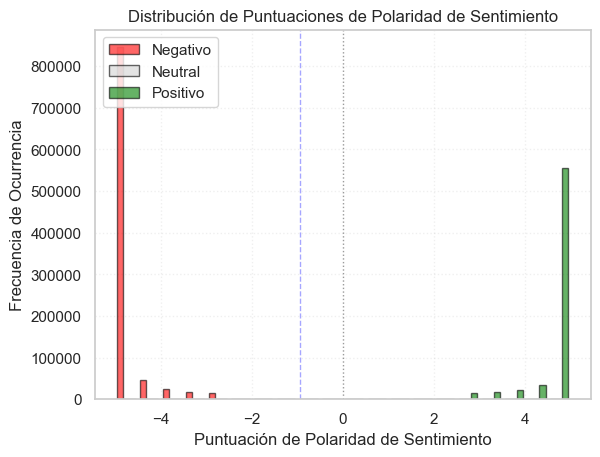

In [3]:
# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Obtener los valores de la columna de puntuaciones de polaridad
sentiment_scores = df_transformers['sentiment_score']

# Definir los límites de los bins
bins = np.linspace(-5, 5, 21)  # 20 bins igualmente espaciados entre -5 y 5

# Dividir los datos en tres categorías: negativa, neutral y positiva
neg_scores = sentiment_scores[sentiment_scores < 0]
neu_scores = sentiment_scores[sentiment_scores == 0]
pos_scores = sentiment_scores[sentiment_scores > 0]

# Crear los histogramas para cada categoría con colores correspondientes
plt.hist([neg_scores, neu_scores, pos_scores], bins, color=['red', 'lightgray', 'green'], edgecolor='black', label=['Negativo', 'Neutral', 'Positivo'], alpha=0.6)

plt.xlabel('Puntuación de Polaridad de Sentimiento')
plt.ylabel('Frecuencia de Ocurrencia')
plt.title('Distribución de Puntuaciones de Polaridad de Sentimiento')

# Personalizar la leyenda
plt.legend(loc='upper left', frameon=True)

# Agregar líneas de referencia para la polaridad neutra y la media
plt.axvline(x=0, color='black', linestyle=':', linewidth=1, alpha=0.35)  # Hacer más opaca la línea de referencia para la polaridad neutra
plt.axvline(x=sentiment_scores.mean(), color='blue', linestyle='--', linewidth=1, alpha=0.35)  # Hacer más opaca la línea de referencia para la media


# Ajustar la transparencia de la cuadrícula
plt.grid(True, linestyle=':', alpha=0.3)

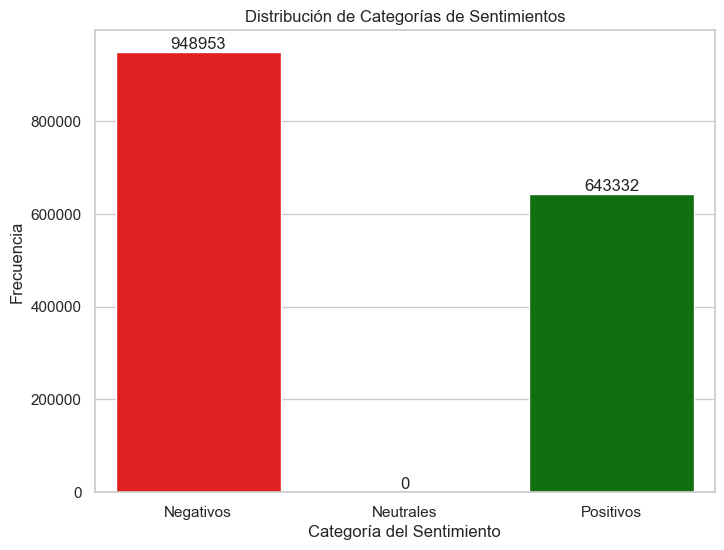

In [4]:
# Contar la cantidad de tweets en cada categoría
tweets_negativos = sum(1 for score in df_transformers['sentiment_score'] if score < -0.5)
tweets_neutrales = sum(1 for score in df_transformers['sentiment_score'] if -0.5 <= score <= 0.5)
tweets_positivos = sum(1 for score in df_transformers['sentiment_score'] if score > 0.5)

# Etiquetas y valores para el gráfico de barras
categorias = ['Negativos', 'Neutrales', 'Positivos']
valores = [tweets_negativos, tweets_neutrales, tweets_positivos]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Colores personalizados
colores = ['red', 'grey', 'green']

# Visualización en gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=categorias, y=valores, palette=colores)

# Añadir etiquetas de valores en las barras
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.xlabel('Categoría del Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías de Sentimientos')
plt.show()


In [5]:
def safe_flesch_reading_ease(text):
    score = textstat.flesch_reading_ease(text)
    return min(score, 100)  # Limita la puntuación a un máximo de 100

# Uso de la función ajustada
df_transformers['Flesch_Score'] = df_transformers['clean_tweet'].apply(safe_flesch_reading_ease)

In [6]:
def clasificar_complejidad(score):
    if score >= 90:
        return "Muy fácil"
    elif score >= 80:
        return "Fácil"
    elif score >= 70:
        return "Bastante fácil"
    elif score >= 60:
        return "Texto estándar"
    elif score >= 50:
        return "Moderadamente difícil"
    elif score >= 30:
        return "Difícil"
    elif score >= 10:
        return "Muy difícil"
    else:
        return "Extremadamente difícil"

# Suponiendo que 'Flesch_Score' es una columna en DF_twitter que contiene las puntuaciones de Flesch Reading Ease
df_transformers['Complejidad_Texto'] = df_transformers['Flesch_Score'].apply(clasificar_complejidad)

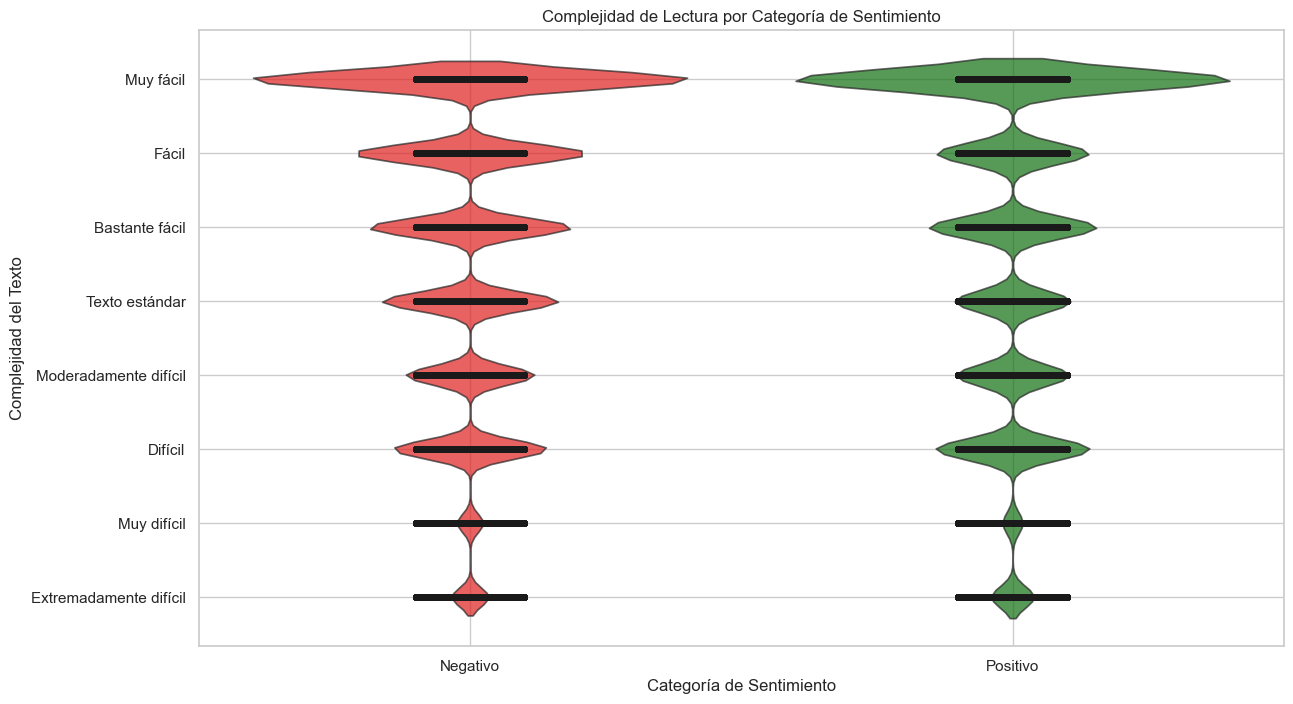

In [7]:

# Asegurarse de que 'Complejidad_Texto' es categórico y ordenado
df_transformers['Complejidad_Texto'] = pd.Categorical(df_transformers['Complejidad_Texto'], categories=[
    'Muy fácil', 'Fácil', 'Bastante fácil', 'Texto estándar', 
    'Moderadamente difícil', 'Difícil', 'Muy difícil', 'Extremadamente difícil'], ordered=True)

# Crear la columna 'Categoria_sentimiento' en el DataFrame
df_transformers['Categoria_sentimiento'] = df_transformers['sentiment_score'].apply(lambda x: 'Positivo' if x > 0 else ('Neutral' if x == 0 else 'Negativo'))

# Definir la paleta de colores para cada categoría
palette = {
    'Negativo': 'red',
    'Neutral': 'lightgray',
    'Positivo': 'green'
}

# Crear el gráfico de violín para visualizar la relación entre polaridad del sentimiento y complejidad de lectura
plt.figure(figsize=(14, 8))
sns.violinplot(x='Categoria_sentimiento', y='Complejidad_Texto', data=df_transformers, palette=palette, inner=None, alpha=0.7)

# Añadir stripplot para mostrar los puntos individuales
sns.stripplot(x='Categoria_sentimiento', y='Complejidad_Texto', data=df_transformers, color='k', alpha=0.6, jitter=True, dodge=True)

plt.title('Complejidad de Lectura por Categoría de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Complejidad del Texto')
plt.grid(True)  # Añadir una cuadrícula para mejorar la visualización
plt.show()